Import Labraries

In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Murid Projects /Thyroid Disease Detection/Dataset/thyroidDF.csv')
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Murid Projects /Thyroid Disease Detection/Dataset/thyroidDF.csv'

In [ ]:
df = pd.read_csv('/content/thyroid.csv')
df.head(5)

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG_measured   TBG  referral_source target  patient_id  
0 NaN            f NaN            f   NaN            other      -   840801013  
1 NaN            f NaN            f   NaN            other      -   840801014  
2 NaN            f NaN            t  11.0            other      -   840801042  
3 NaN            f NaN            t  26.0            other      -   840803046  
4 NaN            f NaN            t  36.0            other      S   840803047  

[5 rows x 31 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

Checking Null Values

In [ ]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

**Correlation Matrix**

<ipython-input-10-effe9b61e02a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

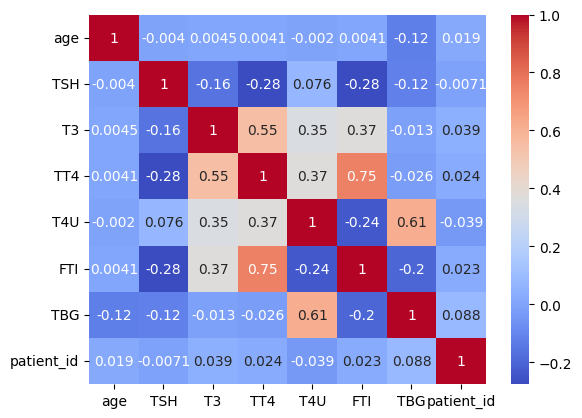

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Delete unnecessary column

In [ ]:
df = df.drop(['TBG', 'patient_id'], axis=1)


In [ ]:
df.head()

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...   T3 TT4_measured  \
0               f              f                 t  ...  NaN            f   
1               f              f                 f  ...  1.9            t   
2               f              f                 f  ...  NaN            f   
3               f              f                 f  ...  NaN            f   
4               f              f                 f  ...  NaN            f   

     TT4 T4U_measured T4U FTI_measured FTI  TBG_measured referral_source  \
0    NaN            f NaN            f NaN             f           other   
1  128.0            f NaN            f NaN             f           other   
2    NaN            f NaN            f NaN             t           other   
3    NaN            f NaN            f NaN             t           other   
4    NaN            f NaN            f NaN             t           other   

   target  
0       -  
1       -  
2       -  
3       -  
4       S  

[5 rows x 29 columns]

Filling Null values

In [ ]:
df['TSH'].fillna(df['TSH'].mean(), inplace=True)
df['T3'].fillna(df['T3'].mean(), inplace=True)
df['TT4'].fillna(df['TT4'].mean(), inplace=True)
df['T4U'].fillna(df['T4U'].mean(), inplace=True)
df['FTI'].fillna(df['FTI'].mean(), inplace=True)

In [ ]:
df['sex'].fillna('F', inplace=True)

Check Again

In [ ]:
df.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
target                 0
dtype: int64

**Histogram for Numerical Features**

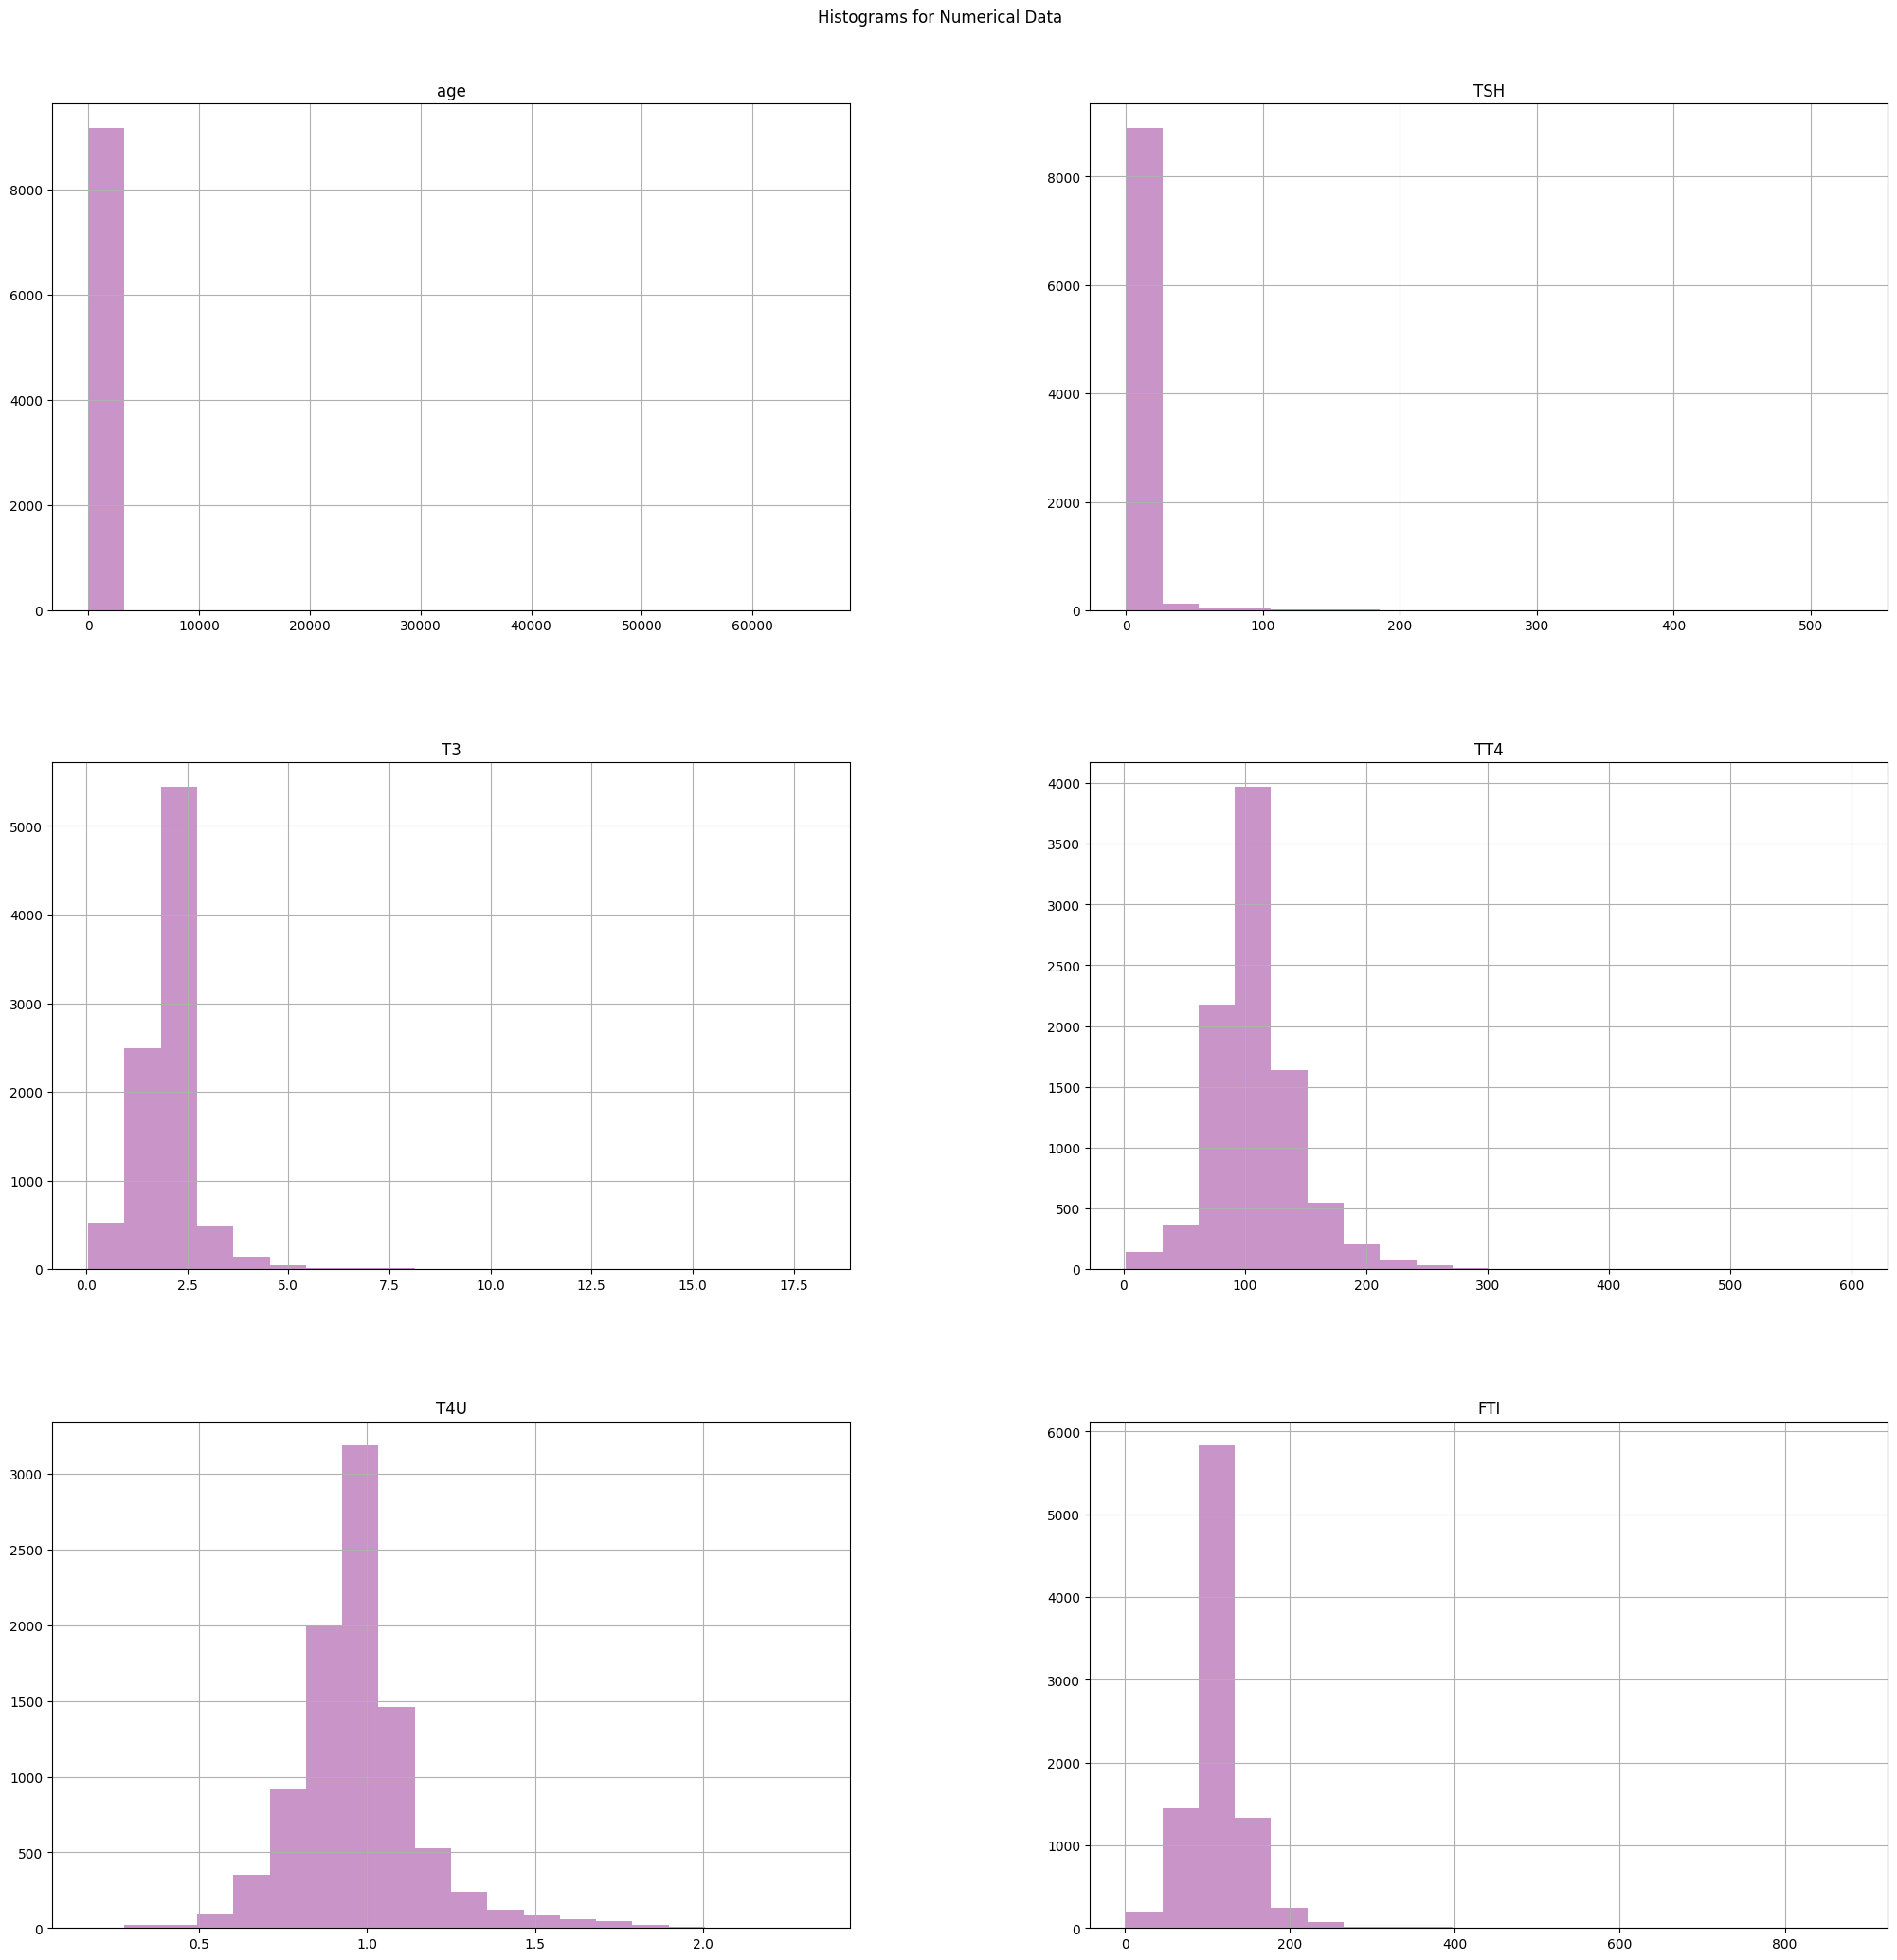

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plot histograms for numerical data
df[numerical_columns].hist(figsize=(25, 25), bins=20, color='#c994c7')
plt.suptitle('Histograms for Numerical Data', y=0.92)
plt.show()



**Bar chart for categorical features**

<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette="rocket")
<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette="rocket")
<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette="rocket")
<ipython-input-13-b2e0546165e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

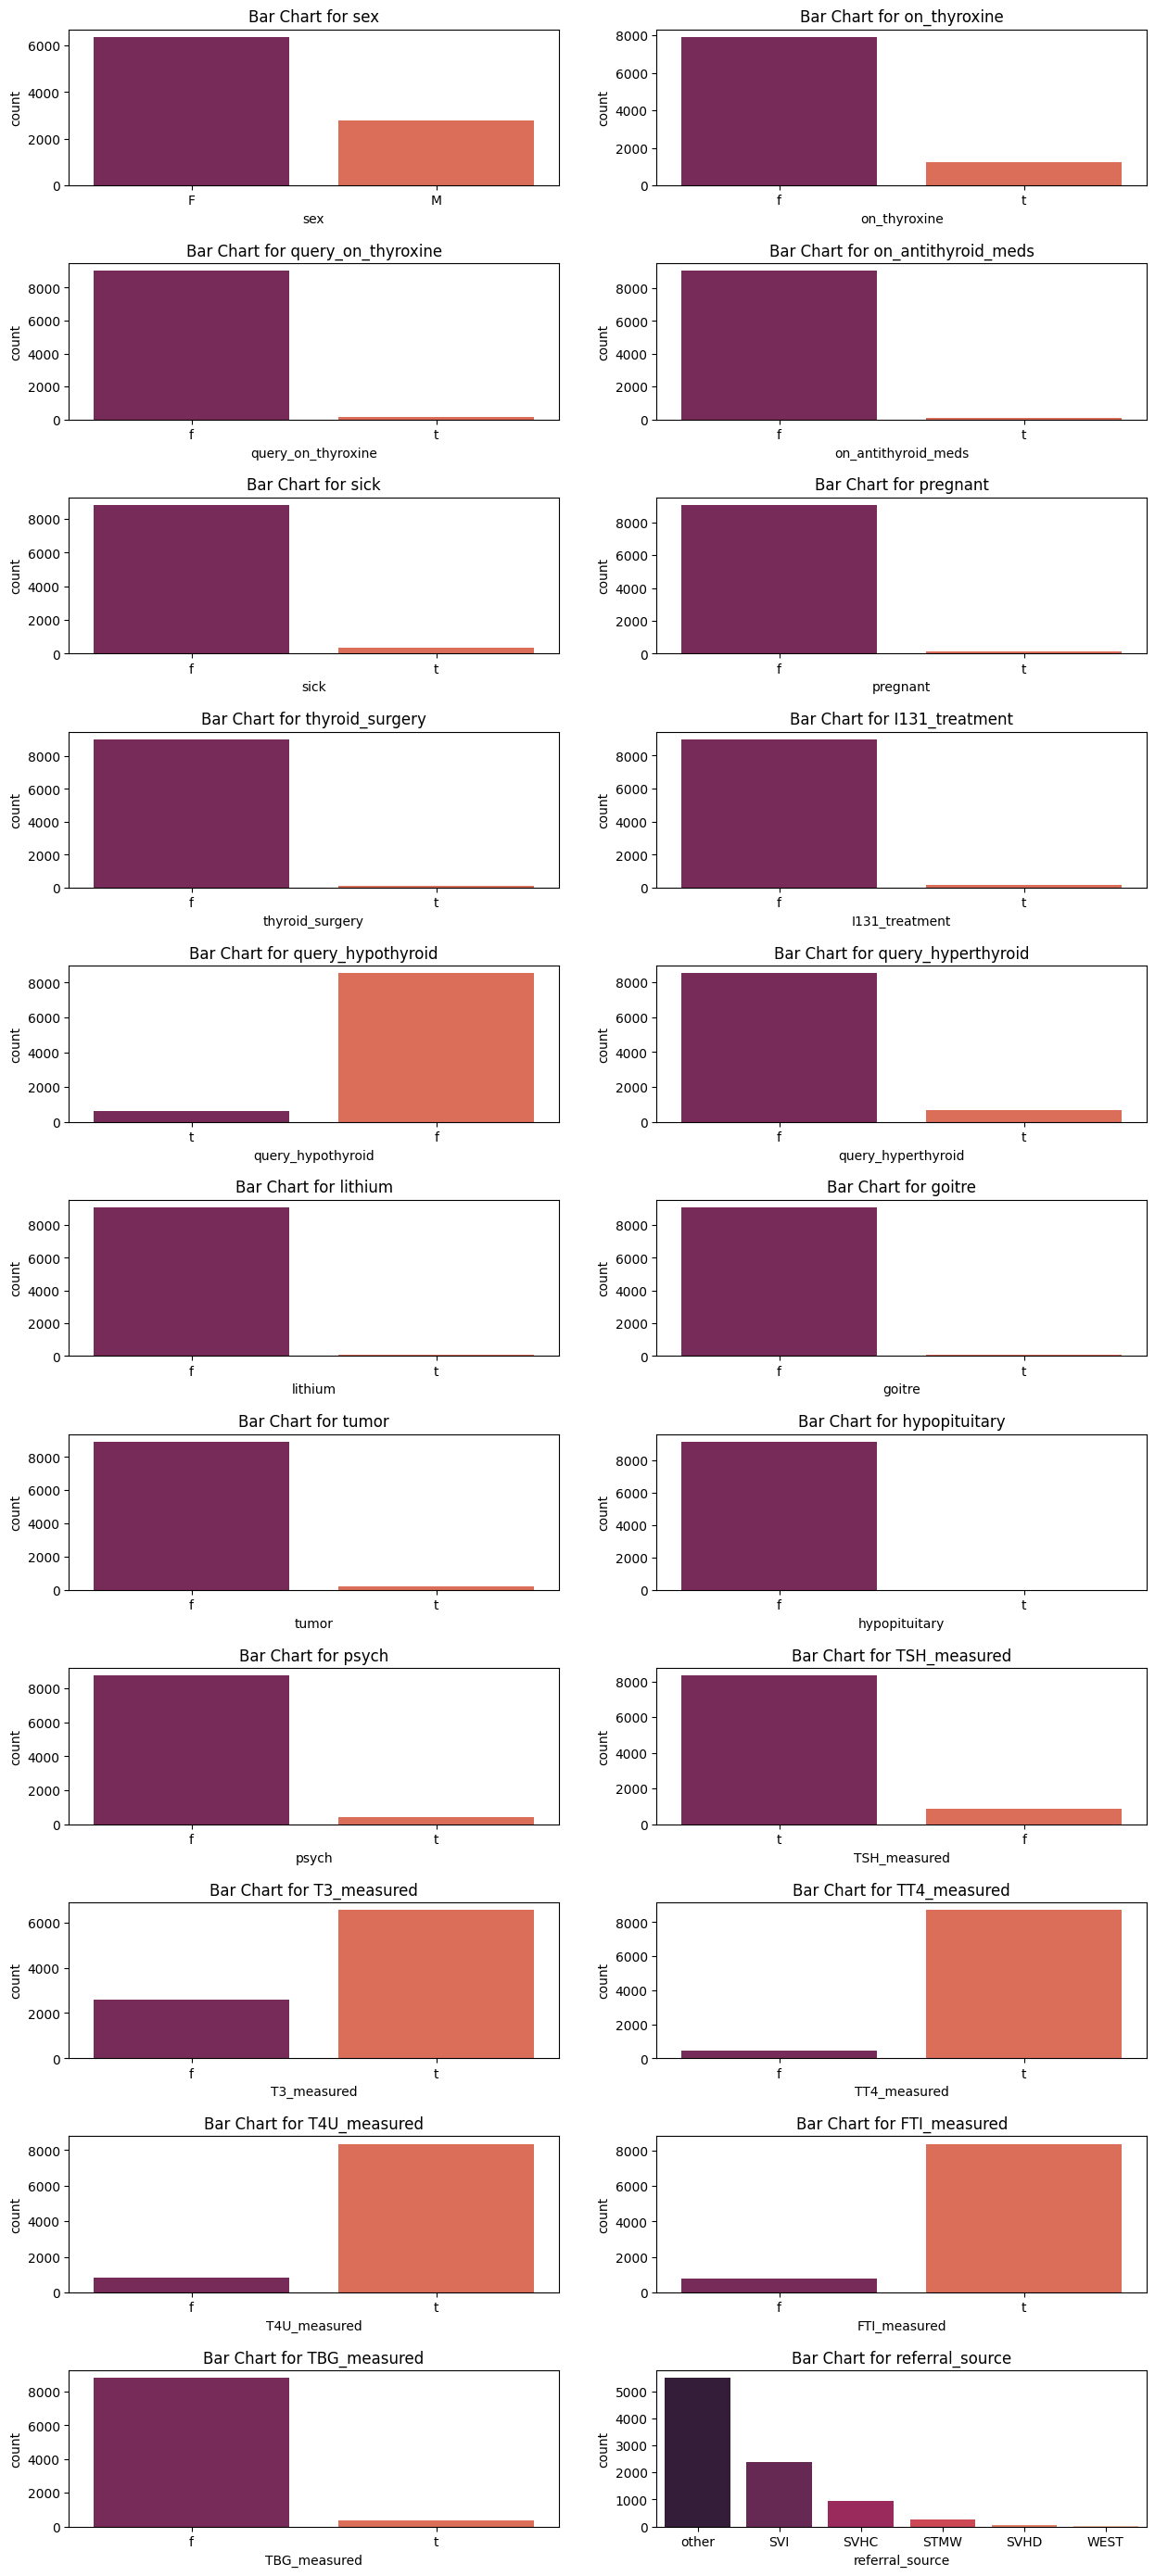

In [ ]:
# Plot bar charts for categorical data
fig, axes = plt.subplots(nrows=len(categorical_columns)//2, ncols=2, figsize=(15, 35))
fig.subplots_adjust(hspace=0.5)

for col, ax in zip(categorical_columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax, palette="rocket")
    ax.set_title(f'Bar Chart for {col}')

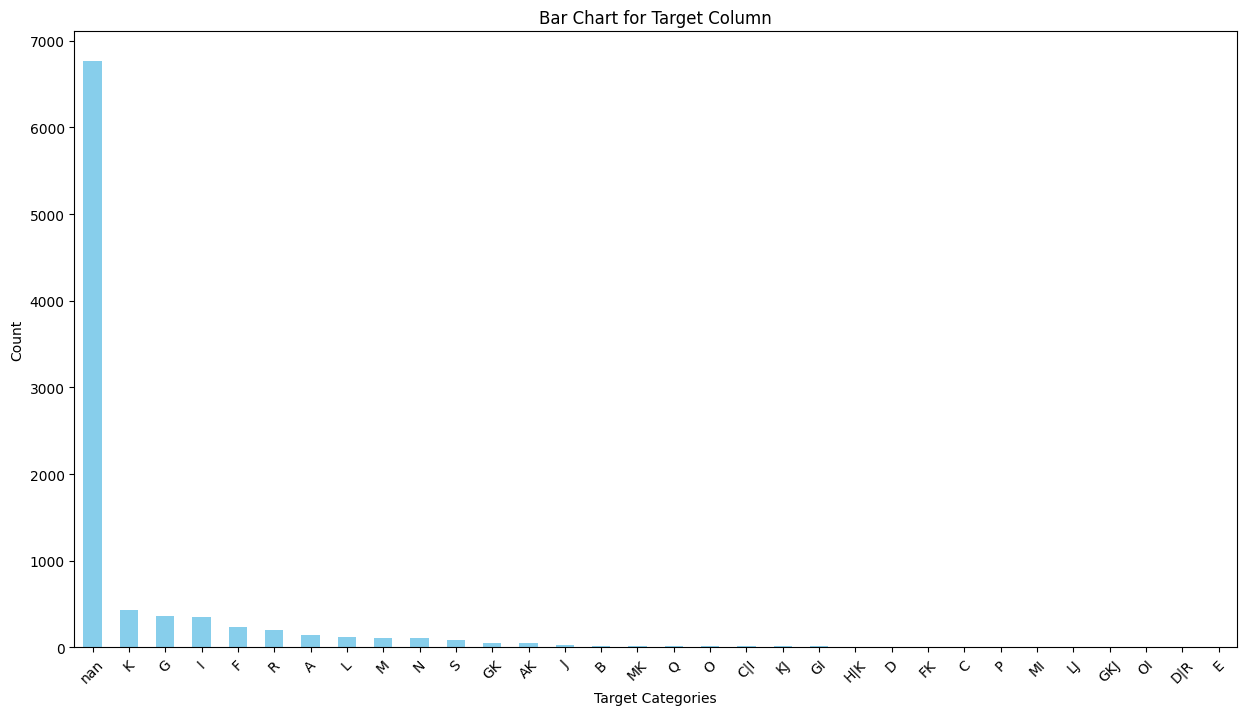

In [ ]:
import pandas as pd

# Replace '-' with NaN
df['target'] = df['target'].replace('-', np.nan)




# Convert the 'target' column back to object (categorical)
df['target'] = df['target'].astype(str)

# Plot the bar chart
plt.figure(figsize=(15, 8))
df['target'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart for Target Column')
plt.xlabel('Target Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Machine Learning doesn't know anything except 0 and 1

In [ ]:
# replacing boolean strings with binary 0 and 1
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

# replacing Male-Female with binary 0 and 1
df.replace('M', 0, inplace=True) # male mapped to 0
df.replace('F', 1, inplace=True) # female mapped to 1

In [ ]:
rs_encoder = { 'other' : 0, 'SVI' : 1, 'SVHC' : 2, 'STMW' : 3, 'SVHD' : 4, 'WEST' : 5}
df['referral_source'] = df['referral_source'].map(rs_encoder)
df['referral_source']

0       0
1       0
2       0
3       0
4       0
       ..
9167    1
9168    1
9169    1
9170    0
9171    0
Name: referral_source, Length: 9172, dtype: int64

In [ ]:
df.head()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0   29    1             0                   0                    0     0   
1   29    1             0                   0                    0     0   
2   41    1             0                   0                    0     0   
3   36    1             0                   0                    0     0   
4   32    1             0                   0                    0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0         0                0               0                  1  ...   
1         0                0               0                  0  ...   
2         0                0               0                  0  ...   
3         0                0               0                  0  ...   
4         0                0               0                  0  ...   

         T3  TT4_measured         TT4  T4U_measured       T4U  FTI_measured  \
0  1.970629             0  108.700305             0  0.976056             0   
1  1.900000             1  128.000000             0  0.976056             0   
2  1.970629             0  108.700305             0  0.976056             0   
3  1.970629             0  108.700305             0  0.976056             0   
4  1.970629             0  108.700305             0  0.976056             0   

          FTI  TBG_measured  referral_source  target  
0  113.640746             0                0     nan  
1  113.640746             0                0     nan  
2  113.640746             1                0     nan  
3  113.640746             1                0     nan  
4  113.640746             1                0       S  

[5 rows x 29 columns]

All features are converted into numerical format.

Now apply **Normalization Technique** to convert them between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=['float64','int64']).columns

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()


age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0  0.000427  1.0           0.0                 0.0                  0.0   0.0   
1  0.000427  1.0           0.0                 0.0                  0.0   0.0   
2  0.000610  1.0           0.0                 0.0                  0.0   0.0   
3  0.000534  1.0           0.0                 0.0                  0.0   0.0   
4  0.000473  1.0           0.0                 0.0                  0.0   0.0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0       0.0              0.0             0.0                1.0  ...   
1       0.0              0.0             0.0                0.0  ...   
2       0.0              0.0             0.0                0.0  ...   
3       0.0              0.0             0.0                0.0  ...   
4       0.0              0.0             0.0                0.0  ...   

         T3  TT4_measured       TT4  T4U_measured       T4U  FTI_measured  \
0  0.106999           0.0  0.178429           0.0  0.373174           0.0   
1  0.103064           1.0  0.210702           0.0  0.373174           0.0   
2  0.106999           0.0  0.178429           0.0  0.373174           0.0   
3  0.106999           0.0  0.178429           0.0  0.373174           0.0   
4  0.106999           0.0  0.178429           0.0  0.373174           0.0   

        FTI  TBG_measured  referral_source  target  
0  0.127604           0.0              0.0       -  
1  0.127604           0.0              0.0       -  
2  0.127604           1.0              0.0       -  
3  0.127604           1.0              0.0       -  
4  0.127604           1.0              0.0       S  

[5 rows x 29 columns]

**Apply 7 Machine Learning Models**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

# Function to evaluate models
def evaluate_model(model_name, y_true, y_pred):
    print(f"-------- {model_name} --------")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Function to evaluate models with confusion matrix
def evaluate_model_with_confusion_matrix(model_name, y_true, y_pred):
    print(f"-------- {model_name} --------")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Load your data (assuming df is defined)

# Prepare data
X = df.drop('target', axis=1)
y = df['target'].astype(str)

# Label Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree Model:\n", class_report)


Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1328
           1       1.00      1.00      1.00        25
           2       0.97      0.93      0.95        40
           3       0.73      0.76      0.74        21
           4       0.71      0.50      0.59        10
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         1
          12       1.00      0.99      0.99        69
          13       0.00      0.00      0.00         1
          14       0.86      1.00      0.92         6
          17       0.79      0.83      0.81        82
          18       1.00      1.00      1.00        12
          19       0.97      1.00      0.99       106
          20       1.00      1.00      1.00         2
          21       0.58      0.50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Generate and print the classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest Model:\n", class_report_rf)


Classification Report for Random Forest Model:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1328
           1       1.00      1.00      1.00        25
           2       0.90      0.95      0.93        40
           3       0.62      0.76      0.68        21
           4       0.78      0.70      0.74        10
           5       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.95      1.00      0.97        69
          13       0.00      0.00      0.00         1
          14       0.86      1.00      0.92         6
          17       0.83      0.70      0.75        82
          18       1.00      0.42      0.59        12
          19       0.94      0.99      0.96       106
          20       1.00      0.50      0.67         2
          21       0.79      0.54      0.64        28
          24       1.00      1.00      1.00         6
          25       0.72      0.90

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Generate and print the classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report for XGBoost Model:\n", class_report_xgb)


Classification Report for XGBoost Model:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1328
           1       0.88      0.92      0.90        25
           2       0.90      0.95      0.93        40
           3       0.67      0.86      0.75        21
           4       0.88      0.70      0.78        10
           5       0.33      0.25      0.29         4
          11       0.00      0.00      0.00         1
          12       0.95      0.88      0.92        69
          13       0.00      0.00      0.00         1
          14       0.86      1.00      0.92         6
          17       0.82      0.78      0.80        82
          18       1.00      0.75      0.86        12
          19       0.97      0.98      0.98       106
          20       1.00      0.50      0.67         2
          21       0.61      0.50      0.55        28
          24       1.00      0.50      0.67         6
          25       0.62      0.75      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create Support Vector Classifier model
svc_model = SVC(random_state=42)

# Fit the model on the training data
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Generate and print the classification report
class_report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report for Support Vector Classifier (SVC) Model:\n", class_report_svc)


Classification Report for Support Vector Classifier (SVC) Model:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1328
           1       0.00      0.00      0.00        25
           2       1.00      0.33      0.49        40
           3       0.75      0.14      0.24        21
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         6
          17       0.91      0.38      0.53        82
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00       106
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00        28
          24       0.00      0.00      0.00         6
          25   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Create Multi-layer Perceptron model
mlp_model = MLPClassifier(random_state=42)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Generate and print the classification report
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report for Multi-layer Perceptron (MLP) Model:\n", class_report_mlp)


Classification Report for Multi-layer Perceptron (MLP) Model:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1328
           1       0.81      0.68      0.74        25
           2       0.90      0.88      0.89        40
           3       0.52      0.52      0.52        21
           4       0.50      0.50      0.50        10
           5       0.50      0.25      0.33         4
           8       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.91      0.58      0.71        69
          13       0.00      0.00      0.00         1
          14       1.00      0.33      0.50         6
          17       0.75      0.48      0.58        82
          18       0.00      0.00      0.00        12
          19       0.79      0.58      0.67       106
          20       0.00      0.00      0.00         2
          21       0.61      0.39      0.48        28
          24      

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

lgbm_model = LGBMClassifier(random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

class_report_lgbm = classification_report(y_test, y_pred_lgbm)
print("Classification Report for LightGBM Model:\n", class_report_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 7337, number of used features: 27
[LightGBM] [Info] Start training from score -0.298600
[LightGBM] [Info] Start training from score -4.446338
[LightGBM] [Info] Start training from score -3.637995
[LightGBM] [Info] Start training from score -4.064403
[LightGBM] [Info] Start training from score -5.317166
[LightGBM] [Info] Start training from score -6.067472
[LightGBM] [Info] Start training from score -7.108926
[LightGBM] [Info] Start training from score -6.415779
[LightGBM] [Info] Start training from score -6.821244
[LightGBM] [Info] Start training from score -8.900685
[LightGBM] [Info] Start training from score -8.900685
[LightGBM] [Info] Start training from score -7.291247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression Model:\n", class_report_lr)



Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1328
           1       0.50      0.04      0.07        25
           2       0.94      0.38      0.54        40
           3       0.57      0.19      0.29        21
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00        69
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         6
          17       0.89      0.41      0.57        82
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00       106
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00        28
          24       0.00      0.00      0.00         6
          25       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

**XGBOOST XAI SHAP & LIME**

In [ ]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.7 MB/s eta 0:00:00


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=671b4dc9e4a309a2d0d098a4d156674c0777abdd7b2b27a3f7b86da94131ffe7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


LIME on Decision Tree

In [ ]:
import lime
from lime import lime_tabular
import numpy as np


class_names = np.unique(y_test)
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=class_names)

index_of_instance = 22
instance_to_explain = X_test.iloc[index_of_instance]


exp = explainer.explain_instance(instance_to_explain.values, dt_model.predict_proba, num_features=len(X_train.columns))

exp.show_in_notebook(show_table=True, show_all=True)


LIME on XGBoost

In [ ]:
import lime
from lime import lime_tabular
import numpy as np

class_names = np.unique(y_test)
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=class_names)


index_of_instance = 22
instance_to_explain = X_test.iloc[index_of_instance]


def predict_proba_wrapper(X):
    return xgb_model.predict_proba(X)


exp = explainer.explain_instance(instance_to_explain.values, predict_proba_wrapper, num_features=len(X_train.columns))


exp.show_in_notebook(show_table=True, show_all=False)


LIME on Random Forest

In [ ]:
import lime
from lime import lime_tabular
import numpy as np

class_names = np.unique(y_test)
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=class_names)


index_of_instance = 22
instance_to_explain = X_test.iloc[index_of_instance]


def predict_proba_wrapper(X):
    return rf_model.predict_proba(X)


exp = explainer.explain_instance(instance_to_explain.values, predict_proba_wrapper, num_features=len(X_train.columns))


exp.show_in_notebook(show_table=True, show_all=False)

Confusion Matrix

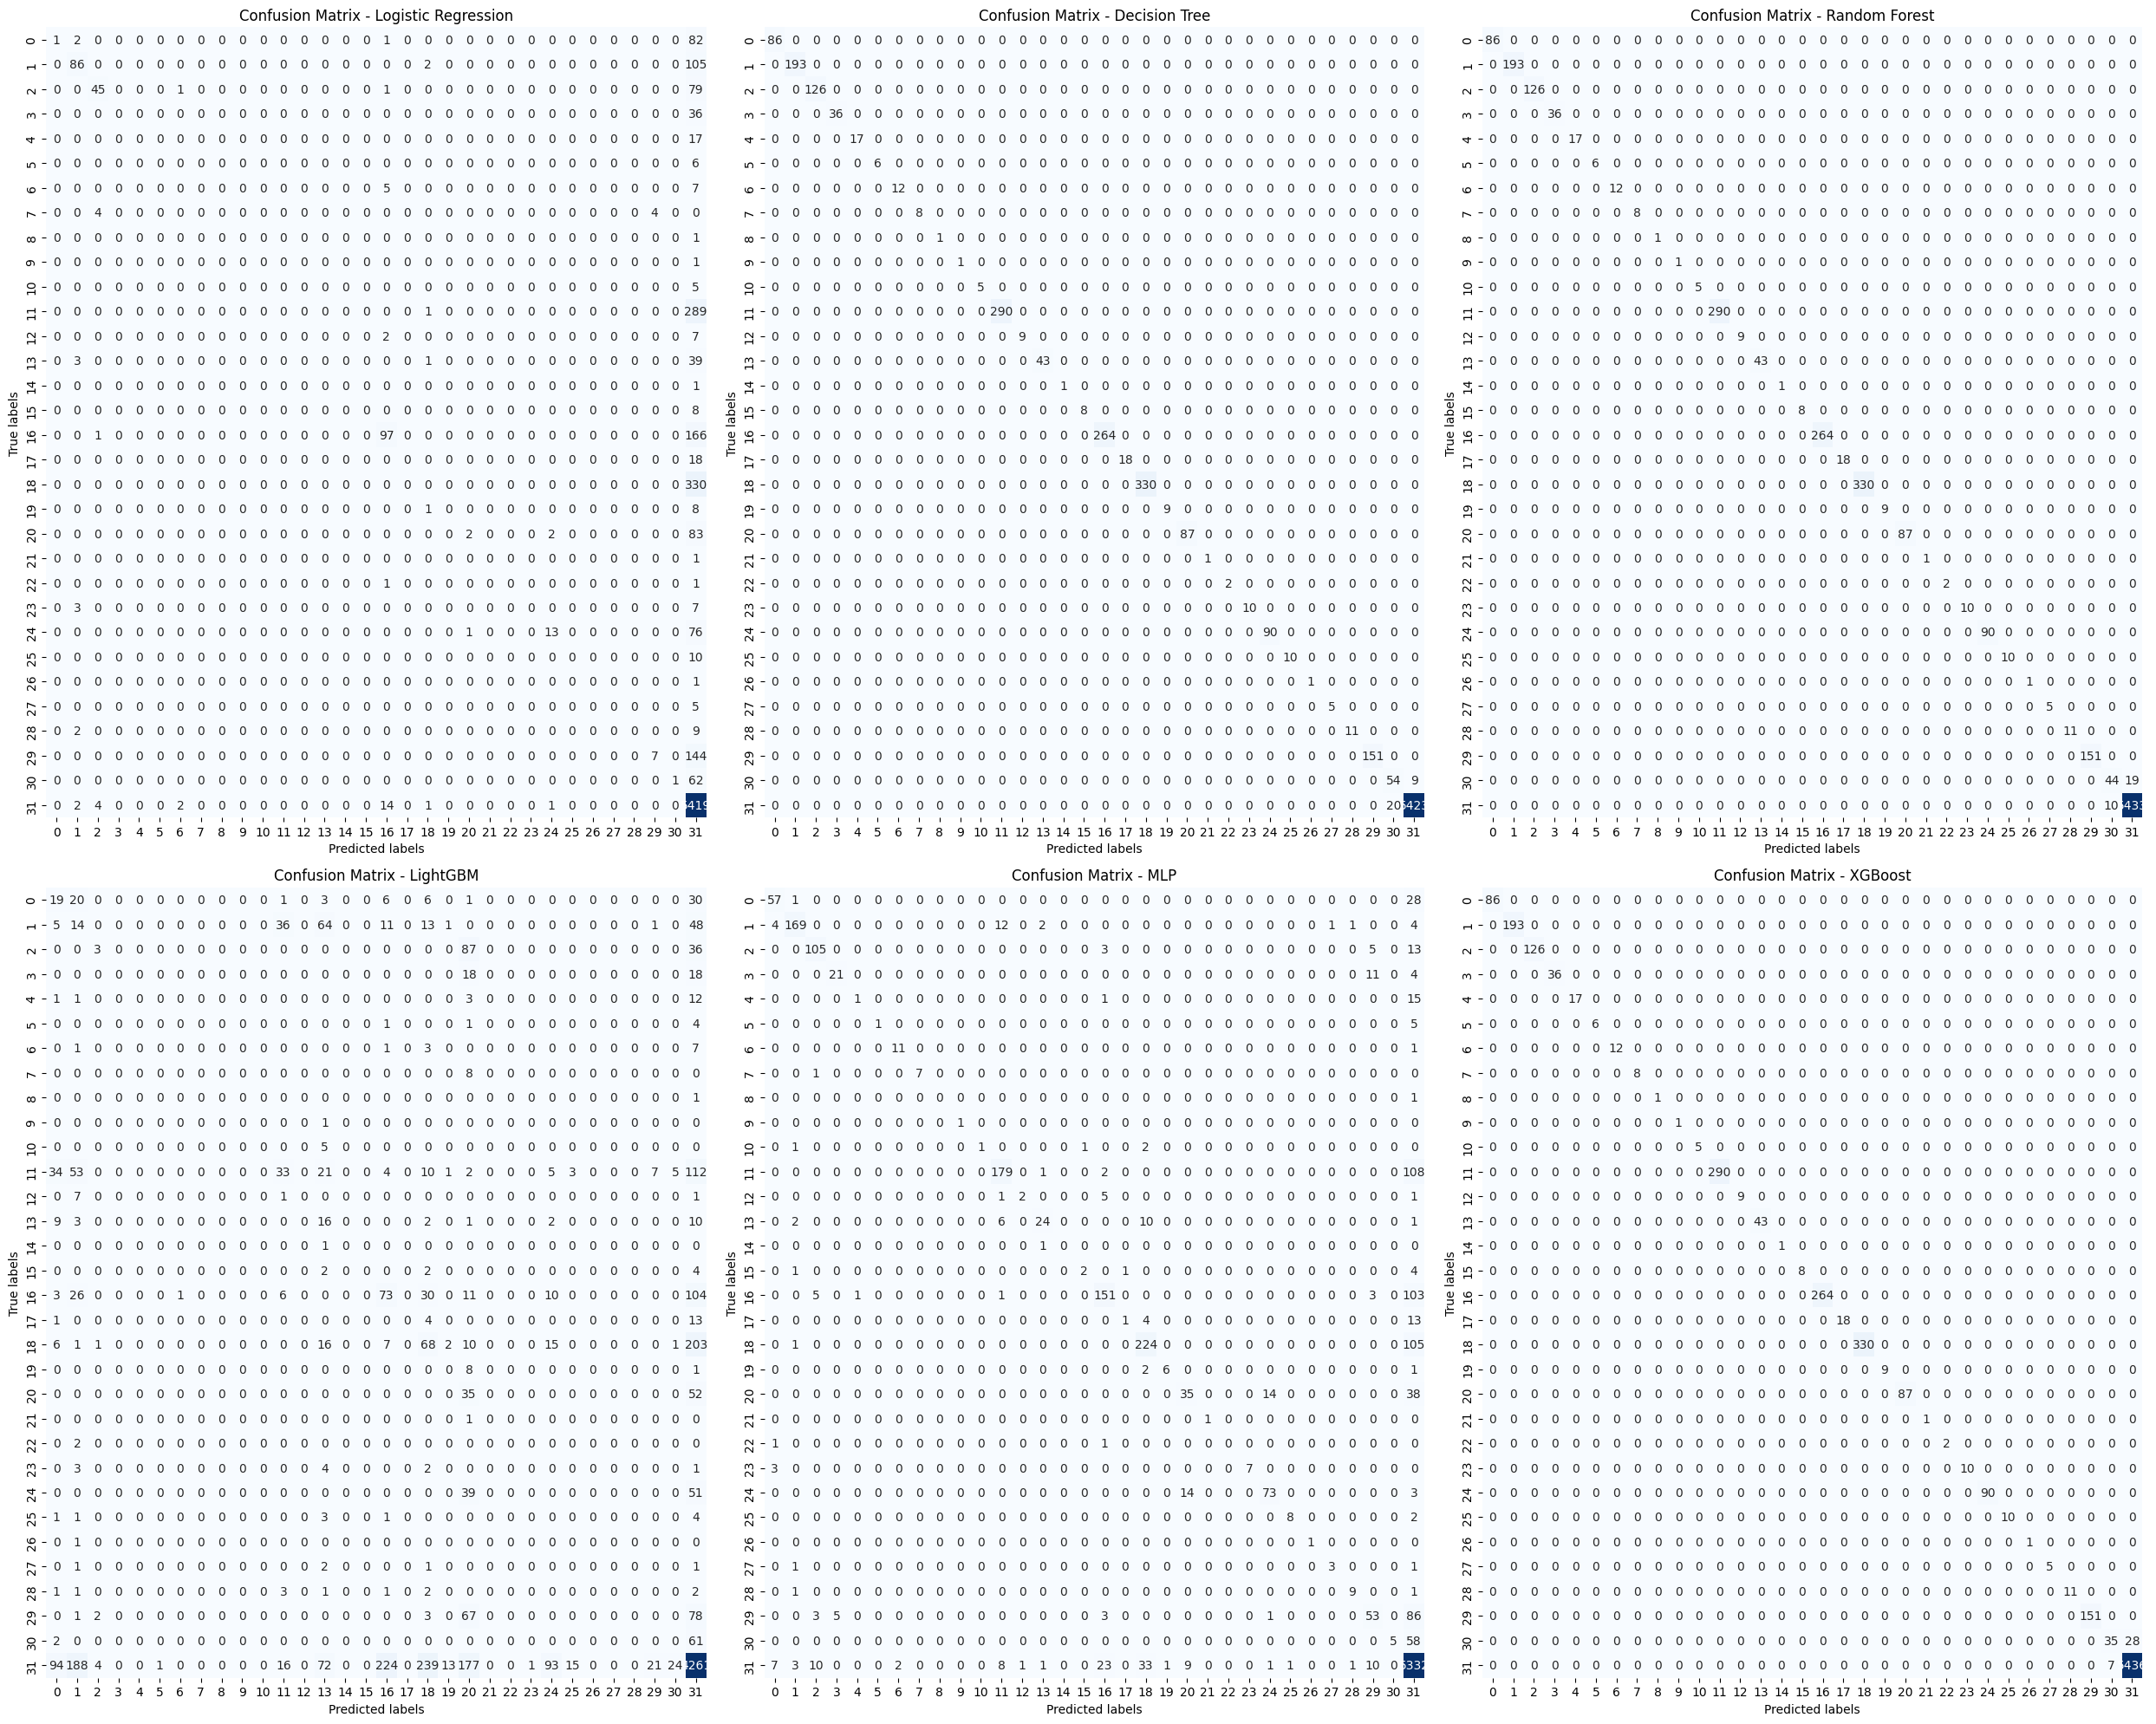

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred_lr = lr_model.predict(X_train)
y_pred = dt_model.predict(X_train)
y_pred_rf = rf_model.predict(X_train)
y_pred_lgbm = lgbm_model.predict(X_train)
y_pred_mlp = mlp_model.predict(X_train)
y_pred_xgb = xgb_model.predict(X_train)

cm1 = confusion_matrix(y_train, y_pred_lr)
cm2 = confusion_matrix(y_train, y_pred)
cm3 = confusion_matrix(y_train, y_pred_rf)
cm4 = confusion_matrix(y_train, y_pred_lgbm)
cm5 = confusion_matrix(y_train, y_pred_mlp)
cm6 = confusion_matrix(y_train, y_pred_xgb)


cms = [cm1, cm2, cm3, cm4, cm5, cm6]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'MLP', 'XGBoost']


fig, axes = plt.subplots(2, 3, figsize=(25, 20))

for cm, model_name, ax in zip(cms, model_names, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()

**DL - ANN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models

num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
try:
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)
except Exception as e:
    print("An error occurred during training:", e)

Epoch 1/20
46/46 [==============================] - 1s 9ms/step - loss: 2.1021 - accuracy: 0.6568 - val_loss: 1.4312 - val_accuracy: 0.7255
Epoch 2/20
46/46 [==============================] - 0s 6ms/step - loss: 1.3178 - accuracy: 0.7460 - val_loss: 1.2782 - val_accuracy: 0.7255
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 1.2357 - accuracy: 0.7460 - val_loss: 1.2209 - val_accuracy: 0.7255
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 1.1780 - accuracy: 0.7458 - val_loss: 1.1800 - val_accuracy: 0.7255
Epoch 5/20
46/46 [==============================] - 0s 5ms/step - loss: 1.1116 - accuracy: 0.7471 - val_loss: 1.1322 - val_accuracy: 0.7255
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 1.0733 - accuracy: 0.7477 - val_loss: 1.0894 - val_accuracy: 0.7268
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 1.0390 - accuracy: 0.7497 - val_loss: 1.0505 - val_accuracy: 0.7275
Epoch 8/20
46/46 [==

Hybrid Model

In [ ]:
X_train_dt = dt_model.predict_proba(X_train)
X_test_dt = dt_model.predict_proba(X_test)

import tensorflow as tf
from tensorflow.keras import layers, models

dnn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_dt.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])


dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


dnn_model.fit(X_train_dt, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
46/46 [==============================] - 1s 10ms/step - loss: 2.6387 - accuracy: 0.6850 - val_loss: 1.3027 - val_accuracy: 0.7684
Epoch 2/20
46/46 [==============================] - 0s 6ms/step - loss: 0.6349 - accuracy: 0.8812 - val_loss: 0.3063 - val_accuracy: 0.9687
Epoch 3/20
46/46 [==============================] - 0s 6ms/step - loss: 0.2353 - accuracy: 0.9623 - val_loss: 0.1441 - val_accuracy: 0.9782
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 0.1397 - accuracy: 0.9753 - val_loss: 0.0937 - val_accuracy: 0.9782
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0992 - accuracy: 0.9787 - val_loss: 0.0677 - val_accuracy: 0.9823
Epoch 6/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0799 - accuracy: 0.9819 - val_loss: 0.0514 - val_accuracy: 0.9911
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 0.9872 - val_loss: 0.0414 - val_accuracy: 0.9939
Epoch 8/20
46/46 [=

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = np.argmax(dnn_model.predict(X_test_dt), axis=1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



58/58 [==============================] - 0s 3ms/step
Precision: 0.22878599918323778
Recall: 0.05013623978201635
F1 Score: 0.05336199705093395


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.05013623978201635


Confusion Mateix for Hybrid Model

58/58 [==============================] - 0s 3ms/step


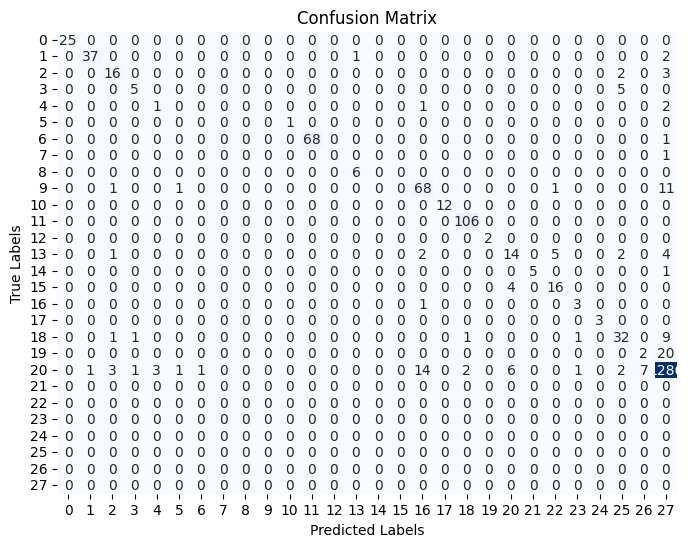

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = np.argmax(dnn_model.predict(X_test_dt), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix for DNN

58/58 [==============================] - 0s 3ms/step


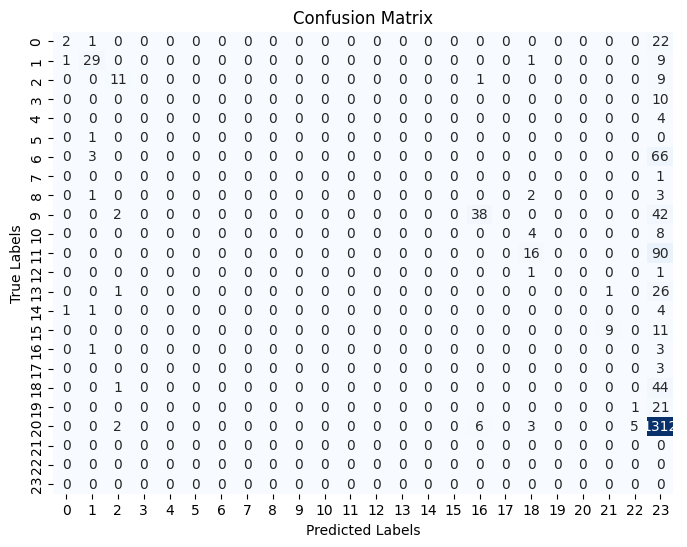

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy Comparison

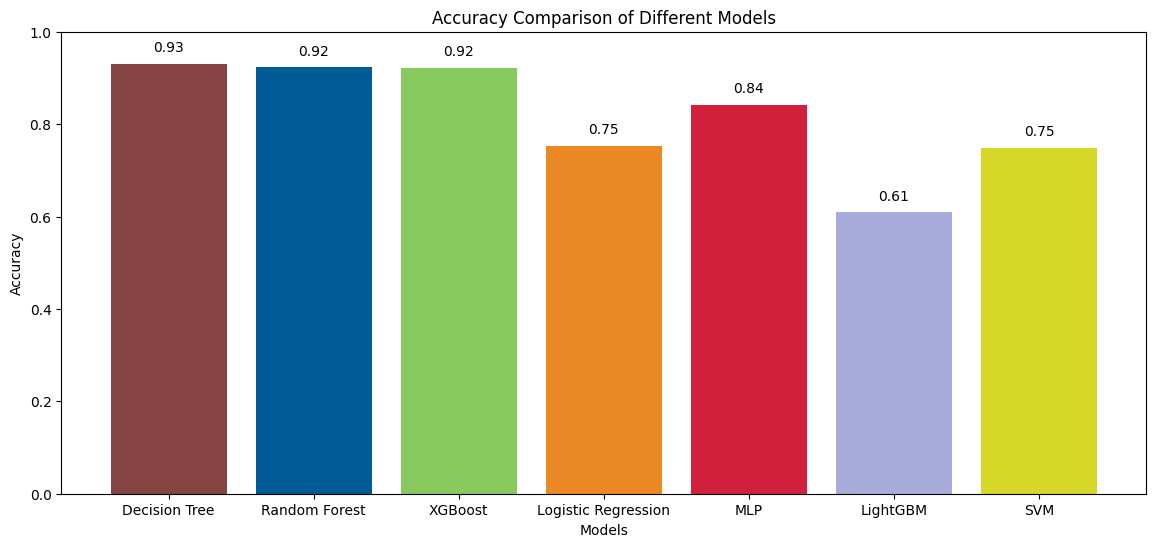

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

models = [dt_model, rf_model, xgb_model, lr_model, mlp_model, lgbm_model, svc_model]
y_preds = [model.predict(X_test) for model in models]

accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in y_preds]

model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression', 'MLP', 'LightGBM', 'SVM']

plt.figure(figsize=(14, 6))
bars = plt.bar(model_names, accuracy_scores, color=['#854442', '#005b96', '#88ca5e', '#eb8926', '#d21f3c', '#a8acdb', '#d6d727'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')

for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(0.0, 1.0)
plt.show()
